# Introduction to deep learning
Benny Avelin
<p><a href="https://commons.wikimedia.org/wiki/File:Colored_neural_network.svg#/media/File:Colored_neural_network.svg">
<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/1200px-Colored_neural_network.svg.png" width=400px alt="Colored neural network.svg">
        </a>
        </center>
        <br>
        <font size="1">By <a href="//commons.wikimedia.org/wiki/User_talk:Glosser.ca" title="User talk:Glosser.ca">Glosser.ca</a> - <span class="int-own-work" lang="en">Own work</span>, Derivative of <a href="//commons.wikimedia.org/wiki/File:Artificial_neural_network.svg" title="File:Artificial neural network.svg">File:Artificial neural network.svg</a>, <a href="https://creativecommons.org/licenses/by-sa/3.0" title="Creative Commons Attribution-Share Alike 3.0">CC BY-SA 3.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=24913461">Link</a>
    </p>
    </font>

# Overview (session 2)

* Quick recap
* Detour into VC-theory and generalization bounds
* Why Deep Neural Networks are difficult
* Open problems

# Previously
A single artificial neuron can then be represented as
$$
    h(x) = \sigma(w \cdot x + b)
$$
where $w$ and $b$ are the weights. $\sigma:\mathbb{R} \to \mathbb{R}$ is an activation function, for instance
* Sigmoid $\frac{1}{1+e^{-x}}$
* ReLU (Rectified Linear Unit) $\sigma(x)=\max(0,x)$

# Previously
We can make more complicated models by adding more neurons, i.e. let us consider:
$$
    f(x) = \sum_{j=1}^k v^j h_{w^j,b^j}(x)
$$

this is what is known as a feed-forward neural network with a single hidden layer.

<center>
    <img src="SingleHidden.png" width=450px>
</center>

In the context of neural networks we let $\sigma: \mathbb{R} \to \mathbb{R}$ and with $\sigma(x)$ where $x \in \mathbb{R}^n$, we apply $\sigma$ componentwise. Denote

$$W^T = (w^1,\ldots, w^k)$$
$$B^T = (b_1,\ldots,b_k)$$
$$v^T = (v_1,\ldots,v_k)$$

then we can write $f$ as
$$
    f(x) = v^T \sigma(Wx+B)
$$

In fact if we introduce $W^{(1)},B^{(1)},W^{(2)},B^{(2)}$ we can consider

$$
\begin{align}
    f^{(1)}(x) &= \sigma(W^{(1)} x + B^{(1)})\\
    f^{(2)}(x) &= \sigma(W^{(2)} f^{(1)}(x) + B^{(2)}) \\
    f(x) &= v^T f^{(2)}(x)
\end{align}
$$

<center>
    <img src="ManyHidden.png" width=700px>
</center>

# Risk & hypothesis
* Let us consider data $(x,y) \sim \mu$, where $x \in \mathbb{R}^n$ and $y \in \mathbb{R}^m$. 

* A hypothesis is a function $h: \mathbb{R}^n \to \mathbb{R}^m$

* A loss-function $L:\mathbb{R}^m \times \mathbb{R}^m \to \mathbb{R}_+$
$$R(h) = \mathbb{E}_{\mu}\left[L(h(x),y)\right], \quad \textbf{Risk}$$

* Given a data-set $D = \{(x_1,y_1), \ldots (x_N,y_N)\}$ which are sampled i.i.d. from $\mu$ we also define
$$R_{emp,D} (h) = \frac{1}{N}\sum_{i=1}^N \left[L(h(x_i),y_i)\right], \quad \textbf{Empirical Risk}$$

* Call a set of hypothesis $\mathcal{H}$, the hypothesis space

# Goal

* Find $h^\ast \in \mathcal{H}$ such that
$$R(h^\ast) = \min_{\mathcal{H}} R(h), \quad \textbf{Risk minimization}$$

* We dont have access to $\mu$ but we have access to a given data-set $D$, we could try to find $h_D^\ast \in \mathcal{H}$ such that
$$R_{emp,D}(h_D^\ast) = \min_{\mathcal{H}} R_{emp,D}(h)$$

* We cannot find $h_D^\ast$ in general. Instead we try to find $h \in \mathcal{H}$ such that $R_{emp,D}(h)$ is as small as possible
$$R_{emp,D}(h_D^\ast) \leq R_{emp,D}(h), \quad \textbf{Empirical Risk Min}$$

# Generalization
The **generalization gap** is the difference between $R(h)$ and $R_{emp,D}(h),$ we would like to know that

$$\mathbb{P}\left[\sup_{h \in \mathcal{H}} |R(h) - R_{\text{emp}}(h)| > \epsilon\right] \quad \text{is small}$$

We are taking the probability over data-sets $D$ of size $N$ sampled i.i.d. from $\mu$.

* Given $h$ we get from the weak law of large numbers that
$$\lim_{N \rightarrow \infty} \mathbb{P}\left[\left|R(h) - R_{\text{emp}}(h)\right| > \epsilon \right] = 0, \quad \text{too weak}$$
$N$ is the sample size.

* Hoeffdings inequality (Assuming $R(h), R_{\text{emp}}(h) \leq 1$):
$$\mathbb{P}\left[|R(h) - R_{\text{emp}}(h)| > \epsilon \right ] \leq 2\exp(-2N\epsilon^2)$$

* If $|\mathcal{H}|$ is finite we could use the union bound and Hoeffdings inequality to get
$$\mathbb{P}\left[\sup_{h \in \mathcal{H}}|R(h) - R_\text{emp}(h)| > \epsilon\right] \leq 
2|\mathcal{H}|\exp(-2N\epsilon^2)$$

**Symmetrization Lemma (Vapnik, Chervonenkis, 1971):** Let $D$ and $D'$ be two different sample data-sets from $\mu$ then
$$\begin{multline}
    \mathbb{P}\left[\sup_{h \in \mathcal{H}}\left|R(h) - R_\text{emp,D}(h)\right| > \epsilon\right] \\
    \leq 2\mathbb{P}\left[\sup_{h \in \mathcal{H}}\left|R_\text{emp,D}(h) - R_\text{emp,D'}(h)\right| > \frac{\epsilon}{2}\right]
\end{multline}
$$

* Lets simplify things. Assume that our hypothesis has output in $\{-1,1\}$ i.e. binary classification.
* Define data-dependent equivalence classes on $\mathcal{H}$ with respect to $D$
$$h_1 = h_2, \iff h_1(x) = h_2(x), \forall (x,.) \in D$$
i.e. they produce the same labels.
* The set of classes is denoted $\mathcal{H}_D$, note that $|\mathcal{H}_D| < \infty$.

$$
\begin{multline}
    \mathbb{P}\left[\sup_{h \in \mathcal{H}_{D\cup D'}}\left|R_\text{emp,D}(h) - R_\text{emp,D'}(h)\right|>\frac{\epsilon}{2}\right] \\
    \leq s(\mathcal{H},N) \sup_{h \in \mathcal{H}} \mathbb{P}\left[\left|R_\text{emp,D}(h) - R_\text{emp,D'}(h)\right|>\frac{\epsilon}{2}\right]
\end{multline}
$$
where $s$ is an upper bound on $\|\mathcal{H}_{D \cup D'}\|$.

# Growth function (shattering number)

The largest size of $\mathcal{H}_D$ for a given $N$ is called the shattering number for $\mathcal{H}$ given $N$
$$s(\mathcal{H},N) = \sup_{x_1,\ldots, x_N} |\mathcal{H}_{\{x_1,\ldots,x_N\}}|$$
> **Note:** this is a combinatorial number and does not depend on $\mu$. 

So, for any two data-sets $D,D'$ we get
$$
\begin{multline}
    \mathbb{P}\left[\sup_{h \in \mathcal{H}_{D\cup D'}}\left|R_\text{emp,D}(h) - R_\text{emp,D'}(h)\right|>\frac{\epsilon}{2}\right] \\
    \leq s(\mathcal{H},N) \sup_{h \in \mathcal{H}}  \mathbb{P}\left[\left|R_\text{emp,D}(h) - R_\text{emp,D'}(h)\right|>\frac{\epsilon}{2}\right]
\end{multline}
$$

# Can we bound $s(\mathcal{H},N)$?

* If we knew nothing then the best we can do is (binary classification)
$$s(\mathcal{H},N) \leq 2^N$$
Remember: Hoeffdings inequality gave a decay of $\exp(-2N\epsilon^2)$. **Too weak**

* This is where **VC**(Vapnik Chervonenkis)-dimension comes in!

# Vapnik Chervonenkis dimension
**Def:** We say that $\mathcal{H}$ **shatters** a set $D = \{x_i,i=1,\ldots, N\}$ for any disjoint split $D_1,D_{-1}$ of $D$ we can find $h \in \mathcal{H}$ such that $h(D_1) = 1$, $h(D_{-1})=-1$.

**Def:** The VC-dimension of $\mathcal{H}$, denoted by $\text{VC-dim}(\mathcal{H})$ , equals the largest integer $n$ such that there exists a set of cardinality $n$ that is shattered by $\mathcal{H}$.

# Sauer–Shelah lemma (1972)
Let $k = \text{VC-dim}(\mathcal{H})$ then for $N > 0$ we have
$$
    s(\mathcal{H},N) \leq \sum_{i=0}^{k-1} {N \choose i}
$$

* Independently proved by Sauer and Shelah in 1972
* Actually proved slightly before by Vapnik and Chervonenkis (1971?)

This is polynomial:
$$s(\mathcal{H},N) \leq \left ( \frac{Ne}{k}\right )^k $$

Proof: Let $\lambda \in (0,1)$ then
$$
\tiny
\begin{align}
    1 &= (\lambda + (1-\lambda))^N \\
    &\geq \sum_{i=1}^{\lambda N} {N \choose i} \lambda^i(1-\lambda)^{n-1} \\
    &\geq \sum_{i=1}^{\lambda N} {N \choose i} \left (\frac{\lambda}{1-\lambda} \right )^{\lambda n} (1-\lambda)^n
\end{align}
$$
Thus
$$
\tiny
\begin{align}
    \sum_{i=1}^{\lambda N} {N \choose i} &\leq e^{N((\lambda-1)\log(1-\lambda)-\lambda \log(1-\lambda))} \\
    &\leq e^{N(\lambda-\lambda \log(1-\lambda))} \\
    &= \left ( \frac{e N}{\lambda N} \right )^{\lambda N}
\end{align}
$$
Then for $k = \lambda N$ we have our result.

# Putting it all together

$$
\tiny
\begin{align}
    \mathbb{P}&\left[\sup_{h \in \mathcal{H}}\left|R(h) - R_\text{emp,D}(h)\right| > \epsilon\right] \\
    &\leq 2\mathbb{P}\left[\sup_{h \in \mathcal{H}}\left|R_\text{emp,D}(h) - R_\text{emp,D'}(h)\right| > \frac{\epsilon}{2}\right] \quad \text{(Symmetrization Lemma)}\\
    &\leq 2 s(\mathcal{H},2 N) \sup_{h \in \mathcal{H}}  \mathbb{P}\left[\left|R_\text{emp,D}(h) - R_\text{emp,D'}(h)\right|>\frac{\epsilon}{2}\right] \text{(Shattering number + Classes)}\\
    &\leq 2 s(\mathcal{H},2 N) \sup_{h \in \mathcal{H}}   \left ( \mathbb{P}\left[\left|R(h) - R_\text{emp,D}(h)\right|>\frac{\epsilon}{4}\right] + \mathbb{P}\left[\left|R(h) - R_\text{emp,D'}(h)\right|>\frac{\epsilon}{4}\right] \right ) \\
    &\leq 8 s(\mathcal{H}, 2N)\exp \left (-\frac{N\epsilon^2}{8} \right ) \quad \text{(Hoeffdings Inequality)} 
\end{align}
$$

> The assumption $R(h) \leq 1$ can be removed.

# VC inequality (1971)

$$
\begin{multline}
    \mathbb{P}\left[\sup_{h \in \mathcal{H}}\left|R(h) - R_\text{emp,D}(h)\right| > \epsilon\right] \\
    \leq 8 s(\mathcal{H},2N) \exp \left (-\frac{N\epsilon^2}{8} \right )
\end{multline}
$$

# VC generalization bound
Thus we can for any $\delta$ find that with probability $(1-\delta)$ the following estimate holds

$$
    R(h) \leq R_{emp,D} + \sqrt{\frac{8 \ln(s(\mathcal{H},2N))+8\ln\frac{8}{\delta}}{N}}
$$

for any $h \in \mathcal{H}$.

# VC generalization bound
$k = \text{VC-dim}(\mathcal{H})$
$$
    R(h) \leq R_{emp,D} + \sqrt{\frac{8 k\ln\left ( \frac{2Ne}{k}\right )+8\ln\frac{8}{\delta}}{N}}
$$
We need $k \lesssim N$ in order for the estimate to be useful.

In [1]:
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt

def find_N(k=1,prec=0.1):
    delta=0.1
    c = 8*k
    t = 8*k*np.log(2*np.e/k)+8*np.log(8/delta)
    func = lambda x: t+c*np.log(x)-prec*x
    x_init = k*1000
    return fsolve(func,x_init)

In [2]:
k = np.arange(1,100)
N = np.array([find_N(k0,1) for k0 in k]).ravel()
def plot_numreq():
    plt.figure(figsize=(7,7))
    plt.plot(k,N)
    plt.xlabel("VC-dimension = $k$")
    plt.ylabel("Datapoints required = $N$")
    plt.title("$\\frac{8 k\\ln\\left ( \\frac{2Ne}{k}\\right )+8\\ln\\frac{8}{\\delta}}{N} = 1, \delta = 0.1$",fontsize=15,pad=10)
    plt.show()

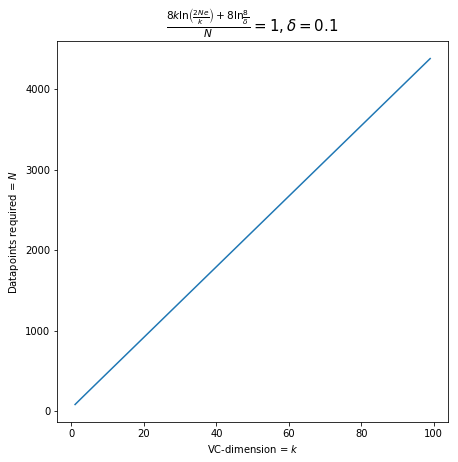

In [3]:
plot_numreq()

# VC dimension of Neural networks
Let $W$ be the total number of parameters of a network
* (Cover 1968, Baum & Haussler 1989) LTU (Linear Threshold unit) 
$$\text{VC-dim} \leq 2 W \log(eW)$$

* (Sontag 1992) $\phi(x) = \frac{1}{\pi} \arctan(x)+ \frac{1}{2} + \frac{cos(x)}{\alpha (1+x^2)}$
$$\text{VC-dim} = \infty$$

In [4]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-10,10,1000)
def plot_act(alpha=10):
    y = (1/np.pi)*np.arctan(x)+0.5 + np.cos(x)/(alpha*(1+x**2))
    plt.figure(figsize=(10,10))
    plt.plot(x,y)
    plt.title("$\\frac{1}{\\pi} \\arctan(x)+ \\frac{1}{2} + \\frac{cos(x)}{alpha (1+x^2)}$".replace('alpha',str(alpha)),fontsize=15,pad=20)
    plt.show()

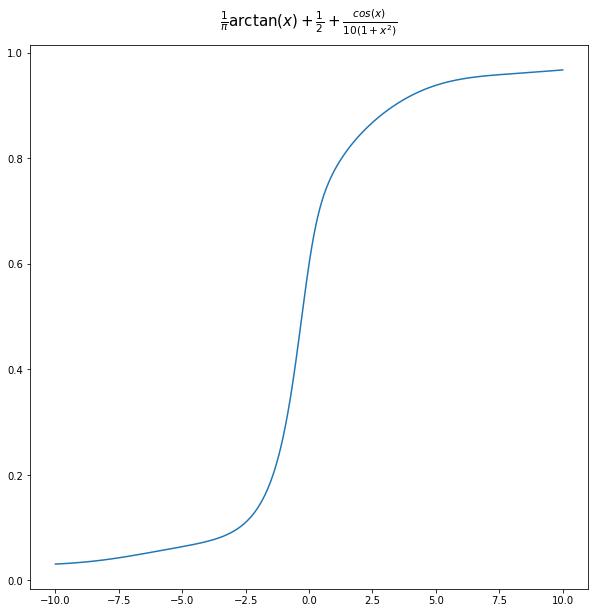

In [7]:
plot_act(alpha=10)

# Proof

$$
\begin{align}
    \eta(x) &= \chi_{\{x \geq 0\}} \\
    y &= \eta(\mathbb{R}ho(x)), \quad x \in \mathbb{R} \\
    \mathbb{R}ho(x) &= \phi(wx) + \phi(-wx)-1 = \frac{2 \cos(wx)}{\alpha(1+w^2x^2)}, \quad w \in \mathbb{R}
\end{align}
$$
<center>
    <img src="InfiniteVC.png" width=600px>
</center>

1. Choose $x_1,\ldots, x_n \in \mathbb{R}$ that are rationally independent.

2. The set of $n$-tuples $(wx_1,\ldots, wx_n)$ modulo $2\pi$ is dense in $[0,2\pi]^n$ for $w \in \mathbb{N}$. *Equidistribution theorem*

3. The vectors of the form $[\cos(wx_1), \ldots, \cos(wx_n)],$ $w \in \mathbb{Z}$ is dense in $[-1,1]^n$. 

4. Thus the network can produce any set of signs in $[-1,1]^n$ on $x_1,\ldots,x_n$ by choosing $w \in \mathbb{Z}$.

5. $$\text{VC-dim} = \infty$$

# VC dimension of Neural networks
Let $W$ be the total number of parameters of a network
* (Cover 1968, Baum & Haussler 1989) LTU (Linear Threshold unit) 
$$\text{VC-dim} \leq 2 W \log(eW)$$
* (Sontag 1992) $\phi(x) = \frac{1}{\pi} \arctan(x)+ \frac{1}{2} + \frac{cos(x)}{\alpha (1+x^2)}$
$$\text{VC-dim} = \infty$$

* (Karpinski & Macintyre 1994) Sigmoid activation 
$$\text{VC-dim} \leq C W^4$$

* (Bartlett, Harvey, Liaw, Mehrabian 2017) Piecewise linear 
$$\text{VC-dim} \leq LW log(pU)$$
Layers, Weights, pieces, Units

# The issue

* In the overparametrized regime we cannot get any information from the VC generalization bound, since in that case $N$ is much smaller than the VC-dimension.

  * Resnet110 is 1.7M parameters but performs really well on 50k images.
  * Other well performing networks are roughly 1M parameters for 50k images.

# Open problems and observations
* Numerical studies finds that sigmoid networks have bigger generalization gap as opposed to ReLU, when trained with SGD. Does this connect to the VC-dimension?

* Is there a regularizing effect of SGD which effectively reduces the VC-dimension?

* Other ways of measuring complexity?

* Are there reasonable ways of *a posteriori* determining the generalization error?
    * For instance can we infer something like $R_{emp,D_0}(h) < \epsilon$ implies that $\mathbb{P}(R_{emp,D'}(h)) \leq O(\epsilon)$?
    * PAC Bayes bounds

# Rademacher complexity
Given a sample $D=((x_1,y_1), \dots, (x_m,y_m)) \in \mathbb{Z}^N$, $\sigma$ is Rademacher distributed (random sign), define

$$
    {\displaystyle \operatorname {Rad} _{D}(\mathcal{H})={\frac {1}{N}}\mathbb {E} _{\sigma }\left[\sup _{h\in \mathcal{H}}\sum _{i=1}^{N}\sigma _{i}L(h(x_i),y_{i})\right]}
$$

where $L(h(x),y) = \chi_{h(x) = y}$.

$$
    R(h) = \mathbb{E}_{(x,y) \sim \mu}[h(x) \neq y]
$$
Then for any hypothesis $h \in \mathcal{H}$ we have with probability at least $1-\delta$
$$
    R(h) - R_{emp,D}(h) \leq \operatorname{Rad}_{D}(\mathcal{H}) + 4 \sqrt{\frac{2\log(4/\delta)}{N}}
$$

# Representativeness

The representativeness can be defined as

$$
    Rep(D,\mathcal{H}) = \sup_{h \in \mathcal{H}} (R(h) - R_{emp,D}(h))
$$

If we split $D$ into two pieces $D_1,D_2$ we could consider estimating $Rep(D,\mathcal{H})$ as

$$
    \sup_{h \in \mathcal{H}} (R_{emp,D_1}(h) - R_{emp,D_2}(h))
$$

this gives rise to the idea of Rademacher complexity

* $\mathcal{H}$ does not necessarily have to be the full space it can be a suitable subspace.
* If we can find a good hypothesis $h$ and a neighbourhood of that with low Rademacher complexity then we can get a generalization bound. 

# PAC Bayes bound (McAllester, 2002)
For any data distribution $\mu$ and any prior $P$ over $\mathcal{H}$, we have the following bound $(S = \{x_i | i = 1,\ldots, N\})$

$$
    \mathbb{P}\left (\phi\left (\mathbb{E}_{h \sim Q} R(h), \mathbb{E}_{h \sim Q} R_{emp,S}(h) \right ) \geq \frac{D[Q || P] + \log(2C\beta) + \log \delta^{-1}}{\beta-1} \right ) < \delta
$$

where $Q$ is an arbitrary posterior distribution over hypothesis. Provided that
$$
    \mathbb{P}(R_{emp}(h) \geq q) \leq C e^{-\beta\phi(q,R(h))}, q \geq R(h)
$$
$$
    \mathbb{P}(R_{emp}(h) \leq q) \leq C e^{-\beta\phi(q,R(h))}, q \leq R(h)
$$


$$
    {\displaystyle D(Q\parallel P)=\int _{-\infty }^{\infty }q(x)\log \left({\frac {q(x)}{q(x)}}\right)\,dx}
$$

# Next session

* Understanding the SGD (Stochastic Gradient Descent) and its connection to PDEs.